# Mapping out density of school-age children in San Francisco
(Sorry for turning this in super late) 
In this assignment, I use U.S. Census Data to map out the density of school-age children by census tract in San Francisco. I focus on the age group of ages 5 to 17. 
This is a part of the group project to examine transit accessibility for high schools in San Francisco. 


In [1]:
# libraries
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
import numpy as np

In [2]:
ag = pd.read_csv('data/sfpop2.csv')

In [3]:
dict_for_FIPS =     {
        'GEO_ID':str,
    }

ag = pd.read_csv(
    'data/sfpop2.csv',
    dtype=dict_for_FIPS
)

In [4]:
ag.head()

,GEO_ID,NAME,S0601_C01_001E,S0601_C01_001M,S0601_C01_002E,S0601_C01_002M,S0601_C01_003E,S0601_C01_003M,S0601_C01_004E,S0601_C01_004M,...,S0601_C04_049E,S0601_C04_049M,S0601_C04_050E,S0601_C04_050M,S0601_C04_051E,S0601_C04_051M,S0601_C04_052E,S0601_C04_052M,S0601_C04_053E,S0601_C04_053M
0,NaN,Geographic Area Name,Estimate!!Total!!Total population,Margin of Error!!Total!!Total population,Estimate!!Total!!Total population!!AGE!!Under ...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!5 to 1...,Margin of Error!!Total!!Total population!!AGE!...,Estimate!!Total!!Total population!!AGE!!18 to ...,Margin of Error!!Total!!Total population!!AGE!...,...,Estimate!!Native; born outside U.S.!!POVERTY S...,Margin of Error!!Native; born outside U.S.!!PO...,Estimate!!Native; born outside U.S.!!POVERTY S...,Margin of Error!!Native; born outside U.S.!!PO...,Estimate!!Native; born outside U.S.!!POVERTY S...,Margin of Error!!Native; born outside U.S.!!PO...,Estimate!!Native; born outside U.S.!!PERCENT A...,Margin of Error!!Native; born outside U.S.!!PE...,Estimate!!Native; born outside U.S.!!PERCENT A...,Margin of Error!!Native; born outside U.S.!!PE...
1,06075010101,Census Tract 101.01; San Francisco County; Cal...,2121,298,6.8,2.2,4.9,2.7,7.7,6.8,...,0,44,0,44,100,44,(X),(X),(X),(X)
2,06075010102,Census Tract 101.02; San Francisco County; Cal...,1908,347,1.7,1.6,13.8,5.2,11.7,5.4,...,0,27.7,0,27.7,100,27.7,(X),(X),(X),(X)
3,06075010201,Census Tract 102.01; San Francisco County; Cal...,2473,522,0.9,1.2,5.1,3.7,6.3,5.3,...,0,36.7,0,36.7,100,36.7,(X),(X),(X),(X)
4,06075010202,Census Tract 102.02; San Francisco County; Cal...,1859,332,4,3.3,2.3,2.7,5.9,5.4,...,0,54.8,0,54.8,100,54.8,(X),(X),(X),(X)


In [5]:
#ag.info(verbose=True, show_counts=True)

In [6]:
# S0601_C01_003E -- Population of people ages 5 to 17
# GEO_ID
# NAME

ag_sub = ag[["GEO_ID", "NAME", "S0601_C01_003E"]]

In [7]:
ag_sub.head()

,GEO_ID,NAME,S0601_C01_003E
0,NaN,Geographic Area Name,Estimate!!Total!!Total population!!AGE!!5 to 1...
1,06075010101,Census Tract 101.01; San Francisco County; Cal...,4.9
2,06075010102,Census Tract 101.02; San Francisco County; Cal...,13.8
3,06075010201,Census Tract 102.01; San Francisco County; Cal...,5.1
4,06075010202,Census Tract 102.02; San Francisco County; Cal...,2.3


In [8]:
ag_sub.columns.to_list()

['GEO_ID', 'NAME', 'S0601_C01_003E']

In [9]:
ag_sub.columns = ['FIPS',
                  'Tract',
                  'Percent Youth Ages 5 to 17'
                 ]
ag_sub = ag_sub.drop(labels=0, axis=0)

In [10]:
ag_sub.head()

,FIPS,Tract,Percent Youth Ages 5 to 17
1,06075010101,Census Tract 101.01; San Francisco County; Cal...,4.9
2,06075010102,Census Tract 101.02; San Francisco County; Cal...,13.8
3,06075010201,Census Tract 102.01; San Francisco County; Cal...,5.1
4,06075010202,Census Tract 102.02; San Francisco County; Cal...,2.3
5,06075010300,Census Tract 103; San Francisco County; Califo...,3.6


In [11]:
# MAP TIME
import geopandas as gpd
tracts=gpd.read_file('data/Census 2020_ Tracts for San Francisco.geojson')
tracts.head()

,name,intptlon,awater,mtfcc,aland,namelsad,tractce,statefp,data_loaded_at,intptlat,funcstat,countyfp,data_as_of,geoid,geometry
0,9805.01,-122.4193463,9769.0,G5020,1471536.0,Census Tract 9805.01,980501,06,2022-03-04,+37.7162081,S,075,2021-02-01,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,171.02,-122.4504754,0.0,G5020,294894.0,Census Tract 171.02,017102,06,2022-03-04,+37.7654353,S,075,2021-02-01,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,123.02,-122.4120970,0.0,G5020,92653.0,Census Tract 123.02,012302,06,2022-03-04,+37.7870222,S,075,2021-02-01,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ..."
3,168.01,-122.4290133,0.0,G5020,226534.0,Census Tract 168.01,016801,06,2022-03-04,+37.7713309,S,075,2021-02-01,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,119.02,-122.4098067,0.0,G5020,93053.0,Census Tract 119.02,011902,06,2022-03-04,+37.7909959,S,075,2021-02-01,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


In [12]:
tracts = tracts[['geoid','geometry']]
tracts.head()

,geoid,geometry
0,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271..."
1,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516..."
2,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ..."
3,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308..."
4,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117..."


In [13]:
tracts.columns = ['FIPS',
                  'geometry'
                 ]


In [14]:
#getting rid of Farallone Islands
tracts.drop([35,88,205], axis=0, inplace=True)

<Axes: >

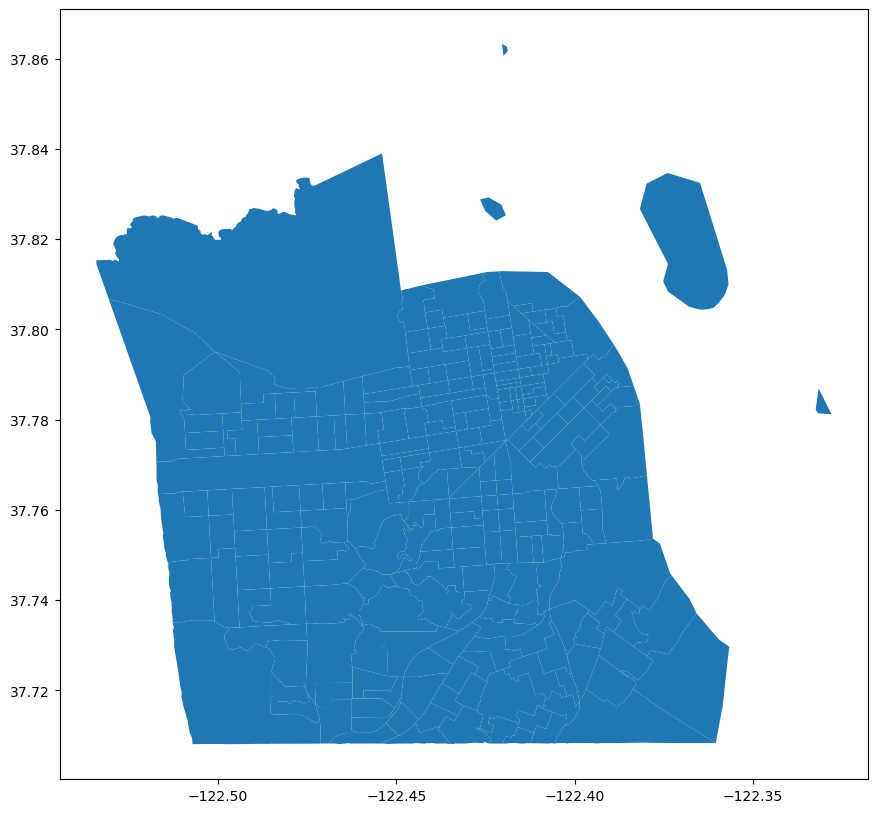

In [15]:
tracts.plot(figsize=(12,10))

In [16]:
# merge
tracts_kids=tracts.merge(ag_sub,on="FIPS")

In [17]:
tracts_kids.head()

,FIPS,geometry,Tract,Percent Youth Ages 5 to 17
0,06075980501,"MULTIPOLYGON (((-122.42722 37.71555, -122.4271...",Census Tract 9805.01; San Francisco County; Ca...,0
1,06075017102,"MULTIPOLYGON (((-122.45321 37.76825, -122.4516...",Census Tract 171.02; San Francisco County; Cal...,6.6
2,06075012302,"MULTIPOLYGON (((-122.415 37.78745, -122.41335 ...",Census Tract 123.02; San Francisco County; Cal...,0.8
3,06075016801,"MULTIPOLYGON (((-122.43235 37.77378, -122.4308...",Census Tract 168.01; San Francisco County; Cal...,5.9
4,06075011902,"MULTIPOLYGON (((-122.41246 37.79163, -122.4117...",Census Tract 119.02; San Francisco County; Cal...,2.6


In [18]:
print(tracts_kids['Percent Youth Ages 5 to 17'].dtypes)

object


In [19]:
tracts_kids["Percent Youth Ages 5 to 17"] = tracts_kids["Percent Youth Ages 5 to 17"].astype(str)

In [20]:
tracts_kids["Percent Youth Ages 5 to 17"] = tracts_kids["Percent Youth Ages 5 to 17"].replace("-",np.nan).astype(float)

In [21]:
#tracts_kids["Percent Youth Ages 5 to 17"] = tracts_kids["Percent Youth Ages 5 to 17"].astype(float)
## Look up if statement later to convert null values to floats (or ignore them) or have a for loop w/ an if statement 

In [22]:
tracts_kids.tail()

,FIPS,geometry,Tract,Percent Youth Ages 5 to 17
236,06075020201,"MULTIPOLYGON (((-122.42646 37.76627, -122.4252...",Census Tract 202.01; San Francisco County; Cal...,3.4
237,06075061508,"MULTIPOLYGON (((-122.39362 37.78308, -122.3928...",Census Tract 615.08; San Francisco County; Cal...,0.7
238,06075013001,"MULTIPOLYGON (((-122.43075 37.79865, -122.4291...",Census Tract 130.01; San Francisco County; Cal...,4.3
239,06075010201,"MULTIPOLYGON (((-122.42484 37.80227, -122.4246...",Census Tract 102.01; San Francisco County; Cal...,5.1
240,06075011101,"MULTIPOLYGON (((-122.4228 37.79216, -122.42258...",Census Tract 111.01; San Francisco County; Cal...,0.8


<Axes: >

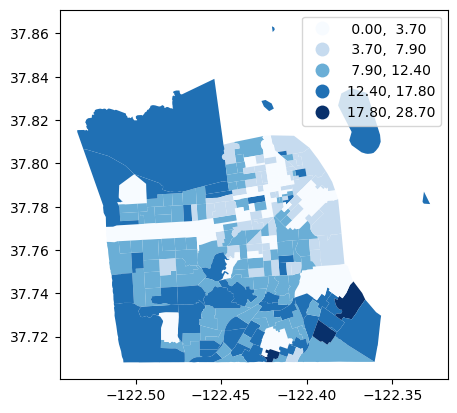

In [23]:
#chloropleth map
tracts_kids.plot(column='Percent Youth Ages 5 to 17', 
                legend=True,
                scheme='NaturalBreaks',
                cmap='Blues')

---

In [24]:
#folium map
import folium

In [28]:
m = folium.Map(location=[37.7749, -122.4194], 
               zoom_start = 12,
               tiles='CartoDB positron', 
               attribution='CartoDB')

# plot chorpleth over the base map
folium.Choropleth(
                  geo_data=tracts_kids, # geo data
                  data=tracts_kids, # data          
                  key_on='feature.properties.FIPS', # key, or merge column
                  columns=['FIPS', 'Percent Youth Ages 5 to 17'], # [key, value]
                  fill_color='YlGnBu',
                  line_weight=0.1, 
                  fill_opacity=0.8,
                  line_opacity=0.5, # line opacity (of the border)
                  legend_name='Population School-Age Youth').add_to(m)    # name on the legend color bar


m

In [30]:
style_function = lambda x: {'fillColor': '#ffffff', 
                            'color':'#000000', 
                            'fillOpacity': 0.1, 
                            'weight': 0.1}
highlight_function = lambda x: {'fillColor': '#000000', 
                                'color':'#000000', 
                                'fillOpacity': 0.50, 
                                'weight': 0.1}
TRACTS = folium.features.GeoJson(
    tracts_kids,
    style_function=style_function, 
    control=False,
    highlight_function=highlight_function, 
    tooltip=folium.features.GeoJsonTooltip(
        fields=['FIPS','Percent Youth Ages 5 to 17'],
        aliases=['FIPS Code: ','School-age youth population in %: '],
        style=("background-color: white; color: #333333; font-family: arial; font-size: 12px; padding: 10px;") 
    )
)
m.add_child(TRACTS)
m.keep_in_front(TRACTS)
folium.LayerControl().add_to(m)
m

---

In [26]:
# graphs
tracts_kids_sorted = tracts_kids.sort_values(by='Percent Youth Ages 5 to 17',ascending = False)
tracts_kids_sorted.head()

,FIPS,geometry,Tract,Percent Youth Ages 5 to 17
66,06075023103,"MULTIPOLYGON (((-122.38405 37.73751, -122.3837...",Census Tract 231.03; San Francisco County; Cal...,28.7
61,06075060502,"MULTIPOLYGON (((-122.42756 37.71178, -122.4273...",Census Tract 605.02; San Francisco County; Cal...,25.1
98,06075023400,"MULTIPOLYGON (((-122.39664 37.72036, -122.3964...",Census Tract 234; San Francisco County; Califo...,21.8
128,06075021700,"MULTIPOLYGON (((-122.45169 37.74563, -122.4509...",Census Tract 217; San Francisco County; Califo...,17.8
102,06075030900,"MULTIPOLYGON (((-122.47607 37.72082, -122.4758...",Census Tract 309; San Francisco County; Califo...,17.7


<Axes: xlabel='FIPS'>

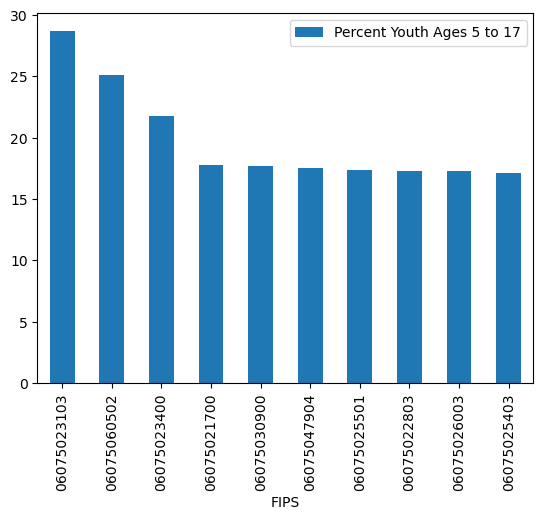

In [27]:
tracts_kids_sorted.head(10).plot.bar(x='FIPS',
                            y='Percent Youth Ages 5 to 17')